In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import investpy
import matplotlib.dates as mdates
from scipy import signal
import yfinance as yf
from tqdm.notebook import tqdm
import datetime as dt
plt.style.use('dark_background')

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".sa" for sy in symbols[:-1]]
np.array(symbols)
 

array(['ABEV3.sa', 'ASAI3.sa', 'AZUL4.sa', 'B3SA3.sa', 'BBAS3.sa',
       'BBDC3.sa', 'BBDC4.sa', 'BBSE3.sa', 'BEEF3.sa', 'BPAC11.sa',
       'BRAP4.sa', 'BRDT3.sa', 'BRFS3.sa', 'BRKM5.sa', 'BRML3.sa',
       'BTOW3.sa', 'CCRO3.sa', 'CIEL3.sa', 'CMIG4.sa', 'COGN3.sa',
       'CPFE3.sa', 'CPLE6.sa', 'CRFB3.sa', 'CSAN3.sa', 'CSNA3.sa',
       'CVCB3.sa', 'CYRE3.sa', 'ECOR3.sa', 'EGIE3.sa', 'ELET3.sa',
       'ELET6.sa', 'EMBR3.sa', 'ENBR3.sa', 'ENEV3.sa', 'ENGI11.sa',
       'EQTL3.sa', 'EZTC3.sa', 'FLRY3.sa', 'GGBR4.sa', 'GNDI3.sa',
       'GOAU4.sa', 'GOLL4.sa', 'HAPV3.sa', 'HGTX3.sa', 'HYPE3.sa',
       'IGTA3.sa', 'IRBR3.sa', 'ITSA4.sa', 'ITUB4.sa', 'JBSS3.sa',
       'JHSF3.sa', 'KLBN11.sa', 'LAME4.sa', 'LCAM3.sa', 'LREN3.sa',
       'MGLU3.sa', 'MRFG3.sa', 'MRVE3.sa', 'MULT3.sa', 'NTCO3.sa',
       'PCAR3.sa', 'PETR3.sa', 'PETR4.sa', 'PRIO3.sa', 'QUAL3.sa',
       'RADL3.sa', 'RAIL3.sa', 'RENT3.sa', 'SANB11.sa', 'SBSP3.sa',
       'SULA11.sa', 'SUZB3.sa', 'TAEE11.sa', 'TIMS3.sa', '

In [7]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=10*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)
        dfOutClose = df['Close']
    
        outClose = pd.concat([outClose,dfOutClose],axis=1)
        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

2022-07-27 2012-07-29


  0%|          | 0/82 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

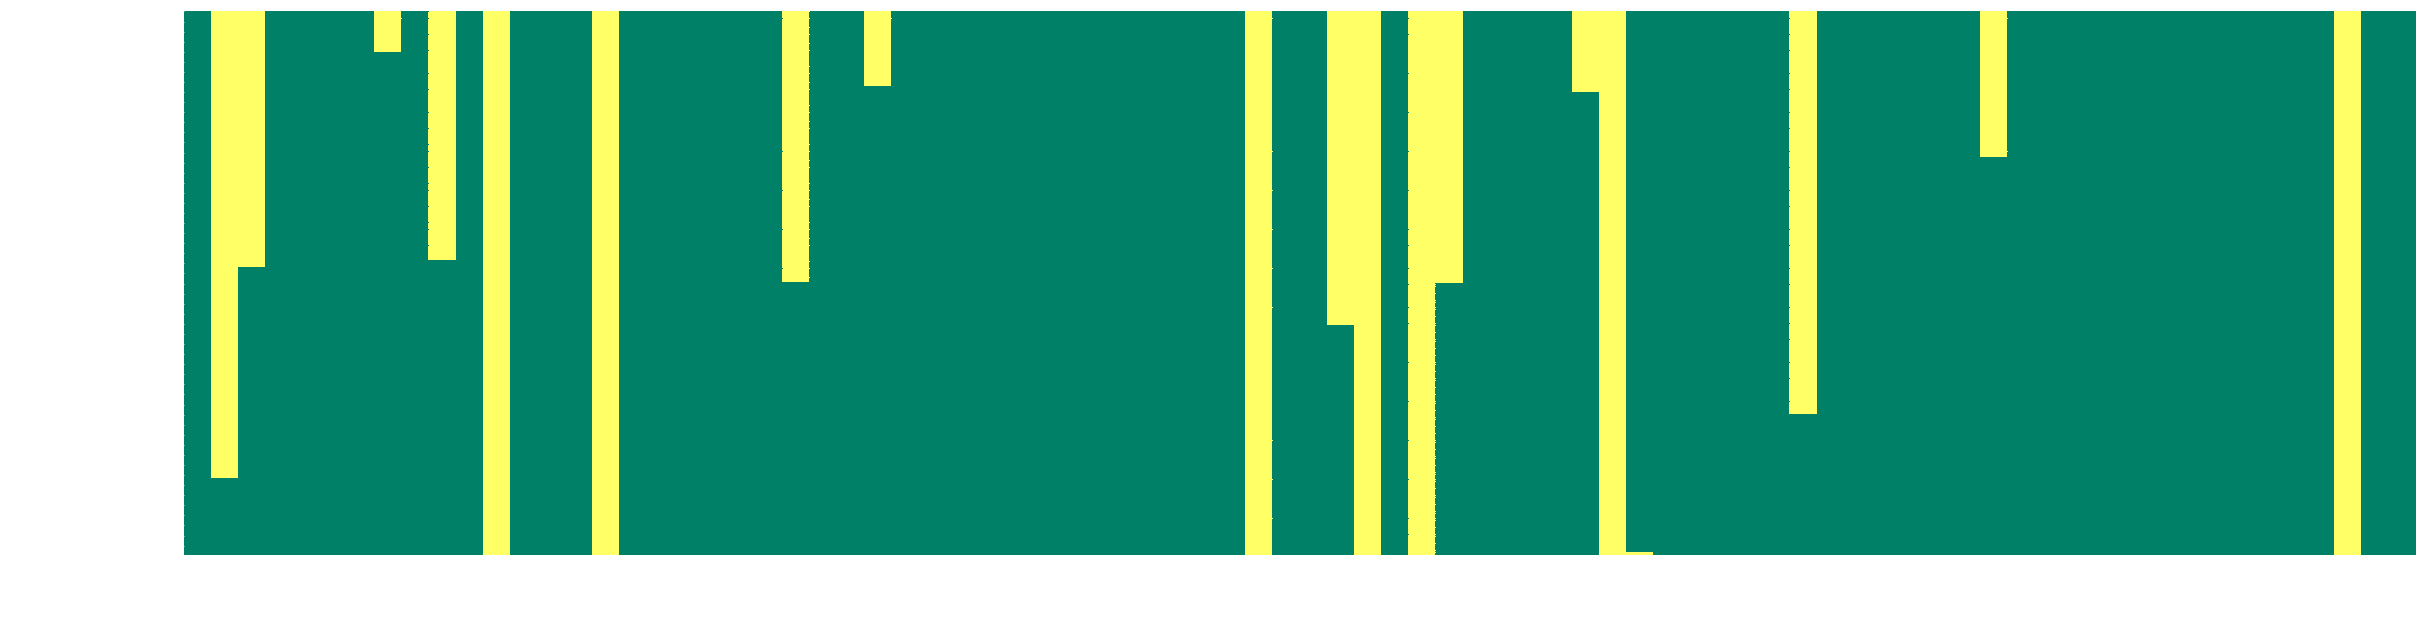

In [5]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

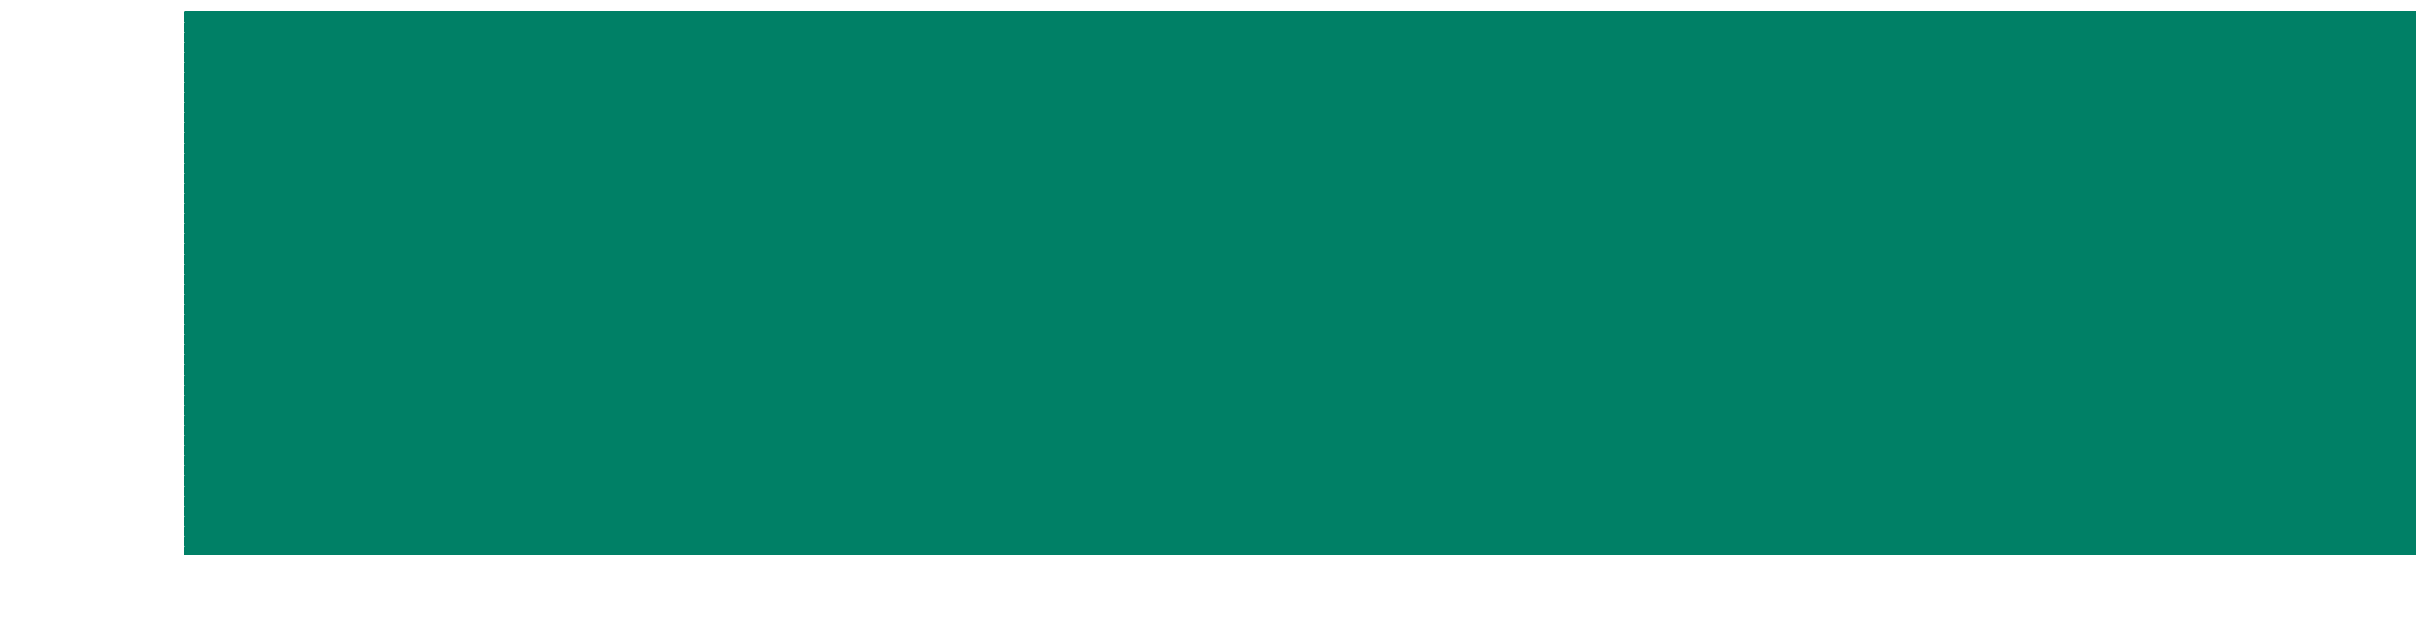

In [6]:
cols=output.columns[output.isnull().sum().values<3]
plt.figure(figsize=(40,10))
sns.heatmap(output[cols].dropna().isnull(),  cbar=False, cmap = 'summer')
output=output[cols].dropna()

In [7]:
output

,ABEV3.sa,B3SA3.sa,BBAS3.sa,BBDC3.sa,BBDC4.sa,BEEF3.sa,BRAP4.sa,BRFS3.sa,BRKM5.sa,BRML3.sa,...,SUZB3.sa,TAEE11.sa,TIMS3.sa,TOTS3.sa,UGPA3.sa,USIM5.sa,VALE3.sa,VIVT3.sa,WEGE3.sa,YDUQ3.sa
2012-07-23,12.198755,3.520000,19.549999,8.445385,10.359379,8.534998,27.091633,28.370001,11.250000,15.384615,...,20.010000,23.483334,8.32,13.041887,22.959999,5.71,37.680000,42.779999,2.658284,8.166666
2012-07-24,12.044771,3.580000,19.700001,8.651024,10.452033,8.466168,25.577688,28.000000,11.410000,15.150501,...,20.010000,23.583332,8.72,13.328010,22.934999,5.62,35.840000,42.189999,2.661242,8.166666
2012-07-25,12.058769,3.600000,19.250000,8.668751,10.498359,8.554664,25.701637,27.740000,11.350000,15.431438,...,20.010000,23.660000,8.77,13.640749,23.000000,5.68,35.650002,41.889999,2.689349,8.166666
2012-07-26,12.428732,3.766666,20.590000,8.721934,10.566068,8.849653,25.914122,27.850000,11.610000,15.719063,...,20.010000,23.653334,9.09,13.208237,23.165001,5.97,36.090000,42.900002,2.751479,8.166666
2012-07-27,12.856688,3.963333,21.629999,9.129667,11.154061,9.075811,26.914562,28.750000,12.550000,16.247492,...,20.010000,23.566666,9.30,13.274777,24.070000,6.63,37.549999,43.610001,2.775147,8.166666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,14.570000,10.280000,32.650002,13.940000,16.719999,13.950000,23.530001,16.240000,33.889999,7.650000,...,46.259998,39.090000,12.99,23.610001,12.010000,8.35,72.800003,47.200001,26.730000,13.890000
2022-07-14,14.840000,10.280000,32.610001,13.630000,16.340000,13.910000,22.250000,16.250000,33.020000,7.550000,...,45.000000,39.570000,12.98,23.240000,11.930000,8.05,67.949997,47.270000,26.400000,14.150000
2022-07-15,14.590000,10.030000,33.279999,13.750000,16.440001,13.350000,22.240000,15.530000,34.779999,7.570000,...,43.939999,39.599998,12.92,23.260000,11.870000,8.38,68.370003,47.180000,26.549999,14.720000
2022-07-18,14.490000,10.270000,33.750000,13.860000,16.650000,13.040000,22.629999,14.650000,33.959999,7.550000,...,43.759998,39.470001,12.87,23.389999,12.020000,8.47,68.730003,46.910000,26.120001,14.710000


In [16]:
a = [1,2,4,5,6,7,8]
a[3:]

[5, 6, 7, 8]

In [22]:
anos=sorted(list(set(output.index.year)))
print(f'anos {anos}\n\n')

treino=[[a,a+1,a+2] for a in anos[:-3]]
print(f'Treino {treino}\n\n')
teste=anos[3:]
print(f'Teste {teste}\n\n')

for tr,te in zip(treino[:7],teste[:7]):
    
    print(tr, te)
    
    print(output.index.year==tr[0])
    break
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    te_aux=output[(output.index.year==te)]
    
    # print(tr_aux, te_aux)
   
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    
    

anos [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


Treino [[2012, 2013, 2014], [2013, 2014, 2015], [2014, 2015, 2016], [2015, 2016, 2017], [2016, 2017, 2018], [2017, 2018, 2019], [2018, 2019, 2020], [2019, 2020, 2021]]


Teste [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


[2012, 2013, 2014] 2015
[ True  True  True ... False False False]


In [207]:
ativos=[13,22,50]

in_sample=tr_aux[tr_aux.columns[ativos]] # k-means
in_sample

,COGN3.sa,ELET6.sa,SANB11.sa
2018-01-02,18.340000,21.840000,32.730000
2018-01-03,18.500000,21.490000,32.459999
2018-01-04,18.750000,21.799999,32.849998
2018-01-05,18.709999,21.250000,33.200001
2018-01-08,17.879999,21.299999,32.480000
...,...,...,...
2020-12-22,4.500000,35.610001,44.369999
2020-12-23,4.600000,36.130001,45.369999
2020-12-28,4.600000,36.730000,46.189999
2020-12-29,4.690000,36.840000,46.160000


In [208]:
out_sample=te_aux[tr_aux.columns[ativos]] # k-means
out_sample

,COGN3.sa,ELET6.sa,SANB11.sa
2021-01-04,4.70,36.200001,44.470001
2021-01-05,4.67,35.160000,43.810001
2021-01-06,4.53,34.959999,45.310001
2021-01-07,4.62,34.299999,45.930000
2021-01-08,4.82,35.299999,45.490002
...,...,...,...
2021-12-23,2.41,32.660000,30.469999
2021-12-27,2.40,32.849998,30.760000
2021-12-28,2.41,32.869999,30.799999
2021-12-29,2.39,32.570000,30.400000


In [209]:
pesos=[0.35, 0.25, 0.4] # Markowitz
np.sum(pesos)

1.0

In [210]:
capital=100000

st_in_1=round(pesos[0]*capital/in_sample[in_sample.columns[0]].iloc[0])
st_in_2=round(pesos[1]*capital/in_sample[in_sample.columns[1]].iloc[0])
st_in_3=round(pesos[2]*capital/in_sample[in_sample.columns[2]].iloc[0])
st_in=[st_in_1,st_in_2,st_in_3]
st_in

[1908.0, 1145.0, 1222.0]

In sample

In [211]:
# Capital Primeiro Dia in sample
np.sum([in_sample[in_sample.columns[i]].iloc[0]*st for i,st in zip(range(3),st_in)])

99995.57990646362

In [212]:
# Capital Ultimo dia in_Sample
np.sum([in_sample[in_sample.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_in)])

106409.00059127808

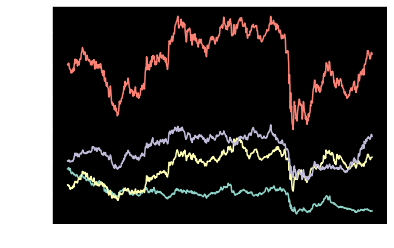

In [213]:
port=[]
for i,st in zip(range(3),st_in): 
    res=in_sample[in_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)


out of sample

In [214]:
st_out_1=round(pesos[0]*capital/out_sample[out_sample.columns[0]].iloc[0])
st_out_2=round(pesos[1]*capital/out_sample[out_sample.columns[1]].iloc[0])
st_out_3=round(pesos[2]*capital/out_sample[out_sample.columns[2]].iloc[0])
st_out=[st_out_1,st_out_2,st_out_3]
st_out

[7447.0, 691.0, 899.0]

In [215]:
# Capital Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[0]*st for i,st in zip(range(3),st_out)])

99993.63020420074

In [216]:
# Ultimo Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_out)])

68225.3885755539

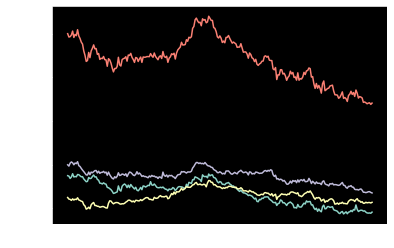

In [217]:
port=[]
for i,st in zip(range(3),st_out): 
    res=out_sample[out_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)

In [218]:
out_sample

,COGN3.sa,ELET6.sa,SANB11.sa
2021-01-04,4.70,36.200001,44.470001
2021-01-05,4.67,35.160000,43.810001
2021-01-06,4.53,34.959999,45.310001
2021-01-07,4.62,34.299999,45.930000
2021-01-08,4.82,35.299999,45.490002
...,...,...,...
2021-12-23,2.41,32.660000,30.469999
2021-12-27,2.40,32.849998,30.760000
2021-12-28,2.41,32.869999,30.799999
2021-12-29,2.39,32.570000,30.400000
